## 1. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install textract==1.6.3

In [ ]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install textract==1.6.3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.8 MB/s eta 0:00:00
   ━

## 2. Exctract the Text from Dataset

In [ ]:
os.listdir('/content/drive/MyDrive/Resumes')

['workday resumes',
 'React Js Developer',
 'Peoplesoft resumes',
 'SQL Developer Lightning insight']

In [ ]:
file_path   = r'/content/drive/MyDrive/Resumes'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    #folder_path = file_path+folder
    folder_path = os.path.join(file_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [ ]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [ ]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [ ]:
import matplotlib.pyplot as plt

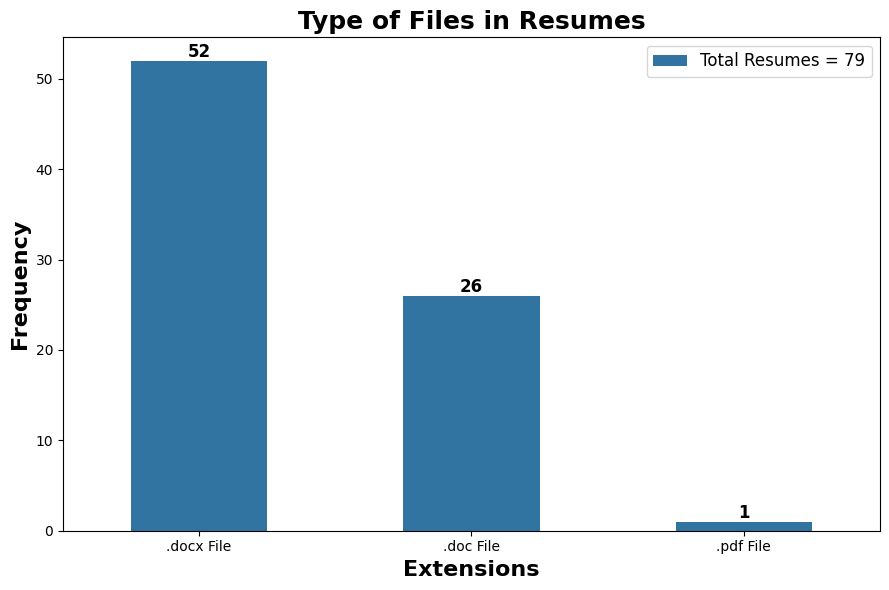

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

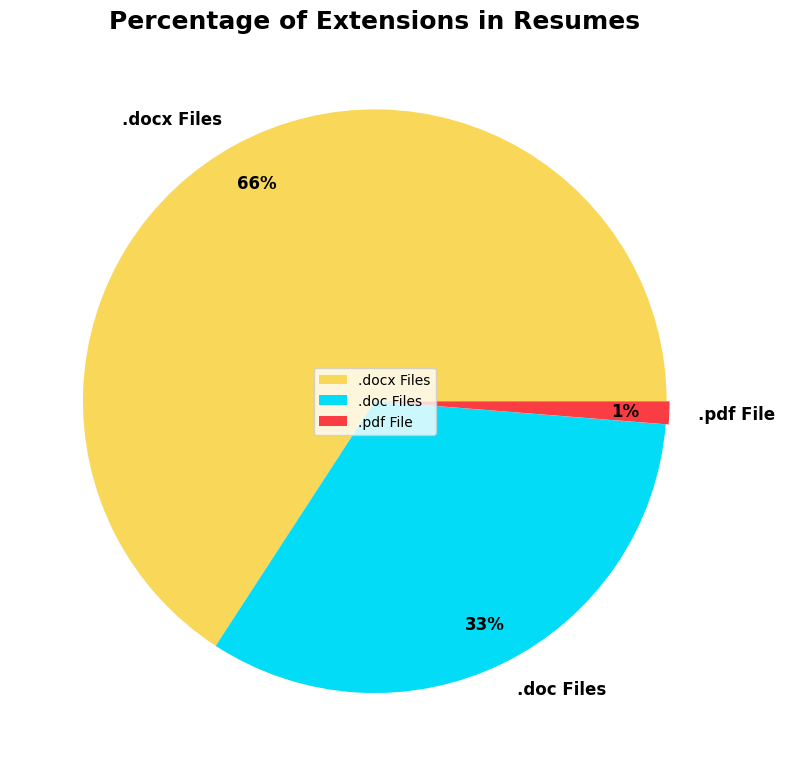

In [ ]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

In [ ]:
!apt-get install antiword

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (262 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-16_amd64.deb ...
Unpacking antiword (0.37-16) ...
Setting up antiword (0.37-16) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...


In [ ]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith(('.docx','.doc')):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [ ]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
1,\n|Personal Details ...,PeopleSoft
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
3,\n PeopleSoft Database Ad...,PeopleSoft
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft
5,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,PeopleSoft
6,\n\nR Ahmed\n PeopleS...,PeopleSoft
7,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
8,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft
9,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft


In [ ]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes/React js developer'
for i in os.listdir(directory2):
    if i.endswith(('.docx','.doc','.pdf')):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [ ]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
1,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
2,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
3,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
5,\n CURRICULUM VIT...,React JS Developer
6,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
7,Name: Ravali P \n\n\n\n ...,React JS Developer
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
9,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer


In [ ]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory3):
    if i.endswith(('.docx','.doc')):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [ ]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
1,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
2,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
3,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
4,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
5,KAMBALLA PRADEEP ...,SQL Developer
6,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
8,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer
9,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer


In [ ]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory4):
    if i.endswith(('.docx','.doc')):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [ ]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
1,\n[pic] Name...,Workday
2,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
3,\n Hari Krishna ...,Workday
4,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
5,G Himaja\n\n ...,Workday
6,Workday HCM Techno functional Consultant ...,Workday
7,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
8,\n Workday Integration Consultant\n\nName...,Workday
9,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday


## 3. Create a DataFrame

In [ ]:
#resume_data = data1.append([data2, data3, data4], ignore_index = True)
#resume_data
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
1,\n|Personal Details ...,PeopleSoft,NaN,NaN,NaN
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
3,\n PeopleSoft Database Ad...,PeopleSoft,NaN,NaN,NaN
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,NaN,NaN,NaN,Workday
76,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday
77,\nShireesh ...,NaN,NaN,NaN,Workday


In [ ]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


### 3.1 Merge all Unnecessary column in One Column

In [ ]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,\n|Personal Details ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,\n PeopleSoft Database Ad...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday,Workday
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,NaN,NaN,NaN,Workday,Workday
76,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday,Workday
77,\nShireesh ...,NaN,NaN,NaN,Workday,Workday


In [ ]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 3.2 Final Dataset

In [ ]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,PeopleSoft,\n|Personal Details ...
2,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
3,PeopleSoft,\n PeopleSoft Database Ad...
4,PeopleSoft,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n..."
5,PeopleSoft,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...
6,PeopleSoft,\n\nR Ahmed\n PeopleS...
7,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
8,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
9,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...


In [ ]:
resume_data["Raw_Details"][4]

'\nPriyanka Ramadoss\n\n61/46, MountPleasant,\nCoonoor\nThe Nilgiris- 643102\n\n\nCareer Objective\n\nTo excel as a software professional by working in a learning and\nchallenging environment and utilize the skills and knowledge through\ndiligence, dedication and ensure maximum contribution to the growth of the\norganization I work for.\n\nProfile Summary\n\nAn Adept IT professional with 4.11 years (September 2016 - present) of\nexperience as Peoplesoft Admin with Accenture\n\nProfessional Summary\n\nPeopleSoft Administrator (September 2016-Present)\n\n    * Experience in PeopleSoft Administration for Finance application.\n    * Proficient in creating and configuring PeopleSoft components like Web\n      server, Application server and process schedulers.\n    * Active monitoring in Non production databases and applications.\n    * Knowledgeable on PeopleSoft migrations using application designer,\n      data mover and taking compare reports and also moving the codes from\n      DEV to 

### 3.3 Save new CSV File

In [ ]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## 4. Data Understanding

In [ ]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,PeopleSoft,\n|Personal Details ...
2,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
3,PeopleSoft,\n PeopleSoft Database Ad...
4,PeopleSoft,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n..."
...,...,...
74,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
75,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...
76,Workday,\nName : Naresh Babu Cherukuri\n\n\nObjective...
77,Workday,\nShireesh ...


In [ ]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
58,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
59,Workday,\n[pic] Name...
60,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
61,Workday,\n Hari Krishna ...
62,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
63,Workday,G Himaja\n\n ...
64,Workday,Workday HCM Techno functional Consultant ...
65,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
66,Workday,\n Workday Integration Consultant\n\nName...
67,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...


In [ ]:
resume_data.isnull().sum()

,0
Category,0
Raw_Details,0


### 4.1 Number of Words in each Resume

In [ ]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']]

,Raw_Details,Word_Count
0,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
1,\n|Personal Details ...,5842
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,448
3,\n PeopleSoft Database Ad...,1727
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",3164
...,...,...
74,Vinay kumar .v\nWorkday Functional Consultant\...,702
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,732
76,\nName : Naresh Babu Cherukuri\n\n\nObjective...,2083
77,\nShireesh ...,3271


### 4.2 Number of Characters

In [ ]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
1,\n|Personal Details ...,11328
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,3714
3,\n PeopleSoft Database Ad...,7070
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",7729


### 4.3 Number of Stopwords

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head(10)

,Raw_Details,Stopwords
0,PeopleSoft Administration\n\n \n\nVivekanand S...,520
1,\n|Personal Details ...,136
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,88
3,\n PeopleSoft Database Ad...,177
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",122
5,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,194
6,\n\nR Ahmed\n PeopleS...,75
7,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
8,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,186
9,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225


### 4.4 Number of Numerics

In [ ]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,PeopleSoft Administration\n\n \n\nVivekanand S...,17
1,\n|Personal Details ...,19
2,Hari Narayana \t\t \n\n\t\n\n\n\n...,13
3,\n PeopleSoft Database Ad...,4
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",4


In [ ]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
1,PeopleSoft,\n|Personal Details ...,5842,11328,136,19
2,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
3,PeopleSoft,\n PeopleSoft Database Ad...,1727,7070,177,4
4,PeopleSoft,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",3164,7729,122,4
...,...,...,...,...,...,...
74,Workday,Vinay kumar .v\nWorkday Functional Consultant\...,702,5126,150,2
75,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,732,4022,96,6
76,Workday,\nName : Naresh Babu Cherukuri\n\n\nObjective...,2083,8113,213,4
77,Workday,\nShireesh ...,3271,12986,365,16


## 5. Text Pre-Processing

### 5.1 Using Regular Expression

In [ ]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [ ]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 5.2 Clean Text from Resume

In [ ]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,\n|Personal Details ...,personal details name pritam biswas date birth...
2,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
3,PeopleSoft,\n PeopleSoft Database Ad...,peoplesoft database administrator gangareddy p...
4,PeopleSoft,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,Vinay kumar .v\nWorkday Functional Consultant\...,vinay kumar workday functional consultant expe...
75,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,hima mendu career objective continue growing k...
76,Workday,\nName : Naresh Babu Cherukuri\n\n\nObjective...,name naresh babu cherukuri objective take resp...
77,Workday,\nShireesh ...,shireesh balasani hcm consultant profile summa...


### 5.3 Save the Clean Data in new CSV File

In [ ]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,personal details name pritam biswas date birth...
2,PeopleSoft,hari narayana professional summary years exper...
3,PeopleSoft,peoplesoft database administrator gangareddy p...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,vinay kumar workday functional consultant expe...
75,Workday,hima mendu career objective continue growing k...
76,Workday,name naresh babu cherukuri objective take resp...
77,Workday,shireesh balasani hcm consultant profile summa...


In [ ]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,personal details name pritam biswas date birth...
2,PeopleSoft,hari narayana professional summary years exper...
3,PeopleSoft,peoplesoft database administrator gangareddy p...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,vinay kumar workday functional consultant expe...
75,Workday,hima mendu career objective continue growing k...
76,Workday,name naresh babu cherukuri objective take resp...
77,Workday,shireesh balasani hcm consultant profile summa...


In [ ]:
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['personal']),
 WordList(['details']),
 WordList(['name']),
 WordList(['pritam']),
 WordList(['biswas']),
 WordList(['date']),
 WordList(['birth']),
 WordList(['present']),
 WordList(['location']),
 WordList(['pune']),
 WordList(['experience']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['development']),
 WordList(['support']),
 WordList(['maintenance']),
 WordList(['upgrade']),
 WordList(['peoplesoft']),
 WordList(['project'])]

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['personal', 'details']),
 WordList(['details', 'name']),
 WordList(['name', 'pritam']),
 WordList(['pritam', 'biswas']),
 WordList(['biswas', 'date']),
 WordList(['date', 'birth']),
 WordList(['birth', 'present']),
 WordList(['present', 'location']),
 WordList(['location', 'pune']),
 WordList(['pune', 'experience']),
 WordList(['experience', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'development']),
 WordList(['development', 'support']),
 WordList(['support', 'maintenance']),
 WordList(['maintenance', 'upgrade']),
 WordList(['upgrade', 'peoplesoft']),
 WordList(['peoplesoft', 'project']),
 WordList(['project', 'ibm'])]

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['personal', 'details', 'name']),
 WordList(['details', 'name', 'pritam']),
 WordList(['name', 'pritam', 'biswas']),
 WordList(['pritam', 'biswas', 'date']),
 WordList(['biswas', 'date', 'birth']),
 WordList(['date', 'birth', 'present']),
 WordList(['birth', 'present', 'location']),
 WordList(['present', 'location', 'pune']),
 WordList(['location', 'pune', 'experience']),
 WordList(['pune', 'experience', 'summary']),
 WordList(['experience', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'development']),
 WordList(['experience', 'development', 'support']),
 WordList(['development', 'support', 'maintenance']),
 WordList(['support', 'maintenance', 'upgrade']),
 WordList(['maintenance', 'upgrade', 'peoplesoft']),
 WordList(['upgrade', 'peoplesoft', 'project']),
 WordList(['peoplesoft', 'project', 'ibm']),
 WordList(['project', 'ibm', 'currently'])]

In [ ]:
resume_data['Resume_Details']

,Resume_Details
0,peoplesoft administration vivekanand sayana ca...
1,personal details name pritam biswas date birth...
2,hari narayana professional summary years exper...
3,peoplesoft database administrator gangareddy p...
4,priyanka ramadoss mountpleasant coonoor nilgir...
...,...
74,vinay kumar workday functional consultant expe...
75,hima mendu career objective continue growing k...
76,name naresh babu cherukuri objective take resp...
77,shireesh balasani hcm consultant profile summa...


##Using CountVectorizer

In [ ]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [ ]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
5,359,server
6,332,data
7,326,reports
8,326,project
9,280,sql


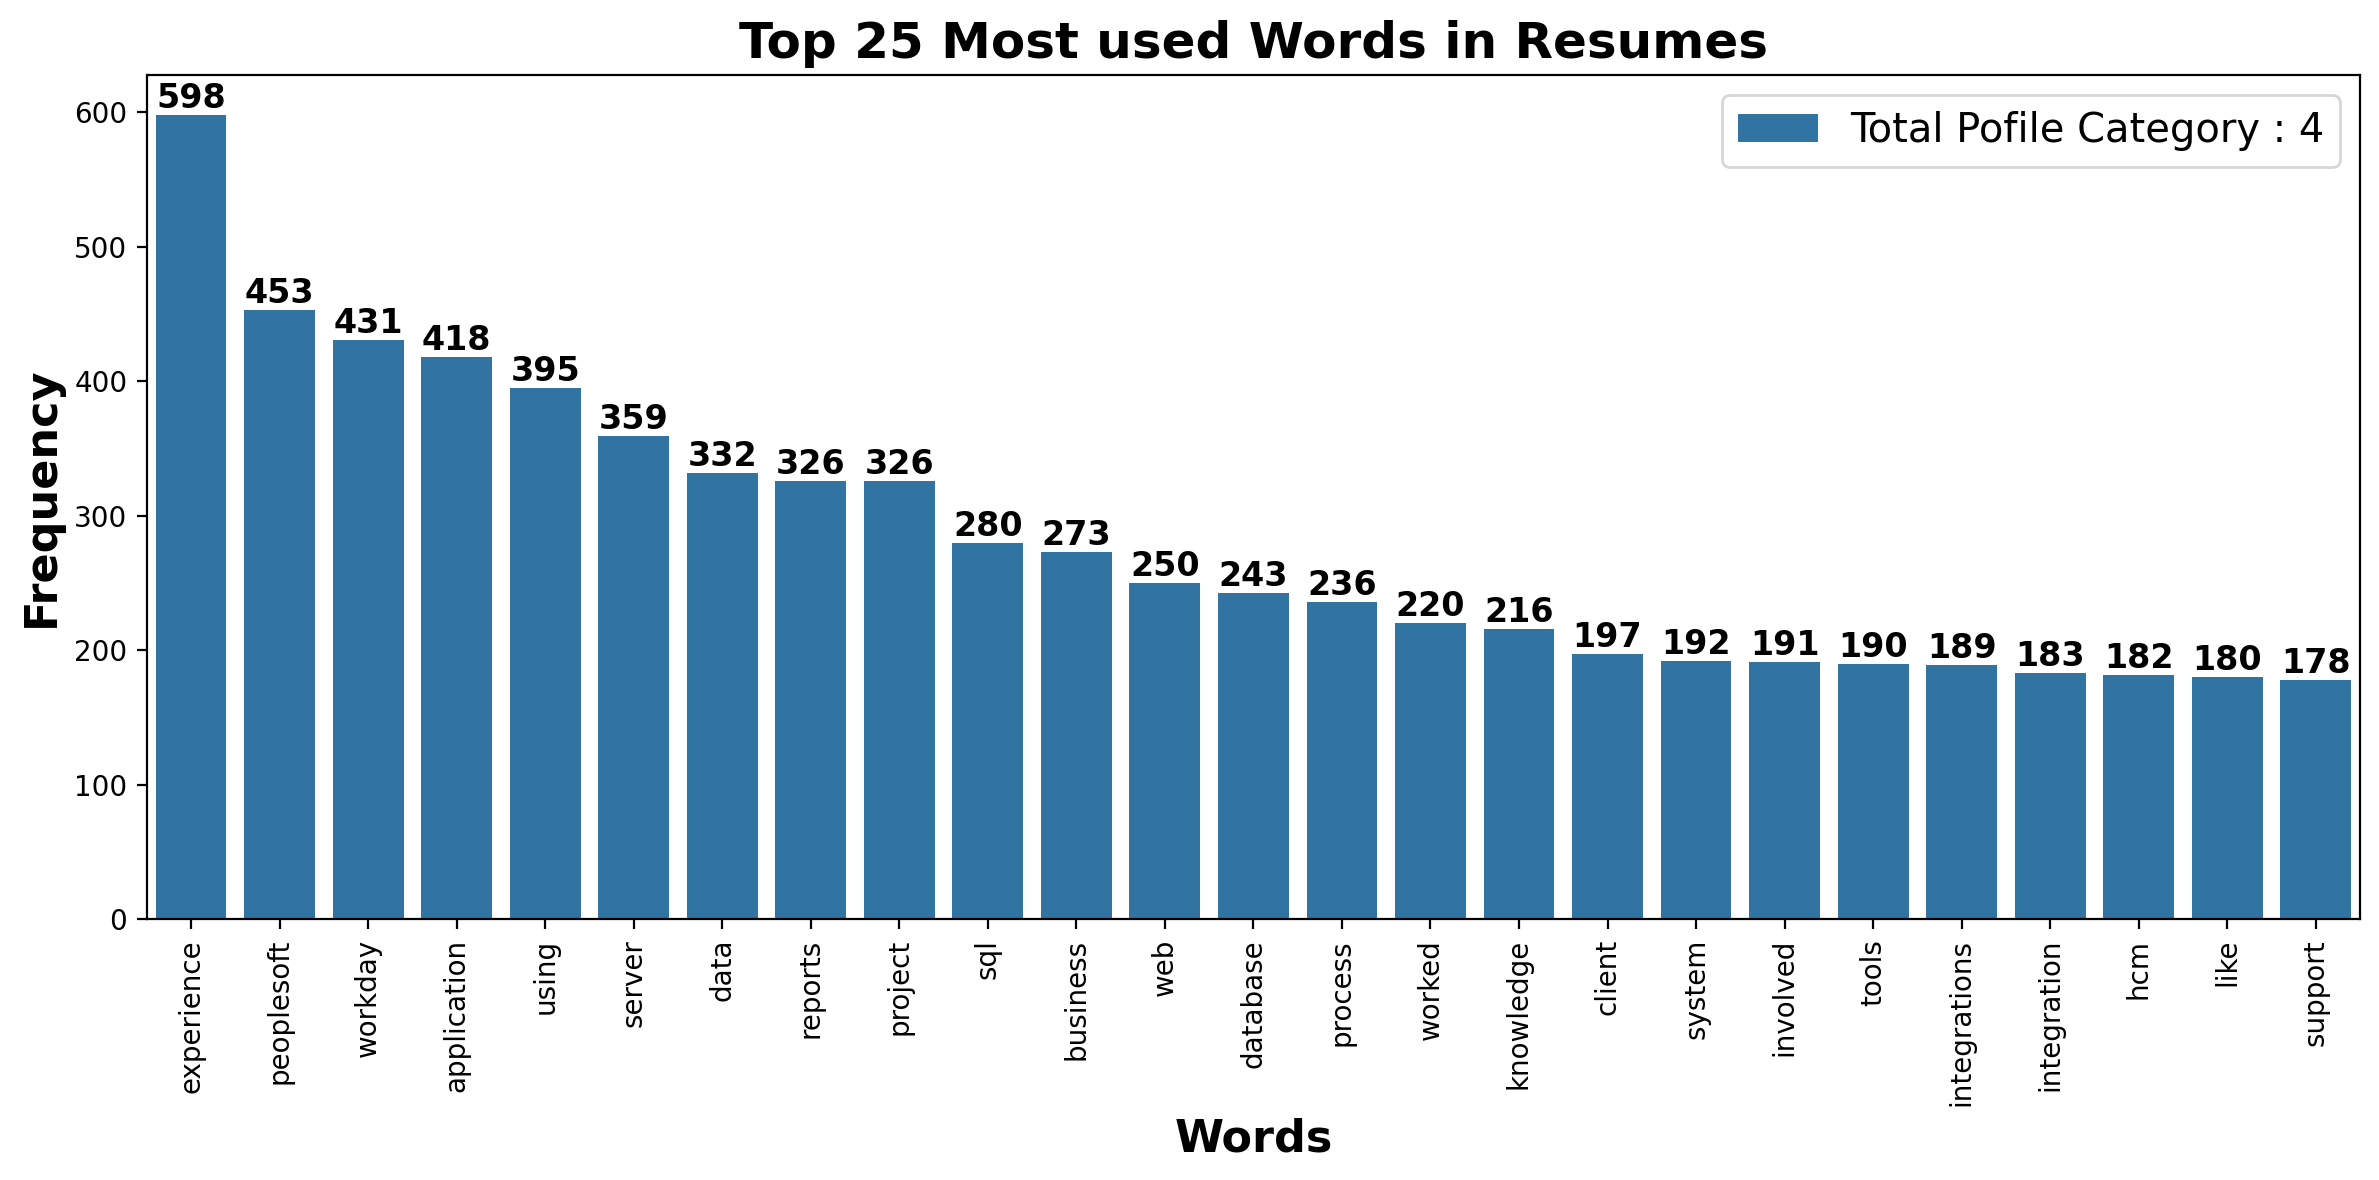

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)


fig.tight_layout()
plt.show()


## 6. Named Entity Recognition (NER)

In [ ]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 142), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


## 7. Parts Of Speech (POS) Tagging

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [ ]:
for token in doc_block[:30]:
    print(token,token.pos_)

lations NOUN
peopletools VERB
hcm PROPN
weblogic PROPN
tuxedo PROPN
people NOUN
books VERB
oracle PROPN
enterprise NOUN
linux PROPN
windows PROPN
experience PROPN
peoplesoft PROPN
installations NOUN
peopletools PROPN
hcm PROPN
weblogic PROPN
tuxedo PROPN
people NOUN
books VERB
windows NOUN
oracle PROPN
enterprise NOUN
linux PROPN
experience PROPN
peoplesoft PROPN
installations NOUN
peopletools NOUN
fscm NOUN
weblogic PROPN


### 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [ ]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['vivekanand', 'sayana', 'career', 'expertise', 'years', 'hope', 'enhance', 'skill', 'set', 'adding', 'value', 'business', 'enable', 'implementation', 'solutions', 'aid', 'company', 'objectives', 'understanding', 'anticipating', 'needs', 'interests', 'motivations', 'clients', 'deliver', 'time', 'budget', 'quality', 'delivering', 'value', 'improving', 'agility', 'quality', 'reliability', 'summary', 'years', 'experience', 'peoplesoft', 'implementation', 'support', 'configuration', 'migrations', 'application', 'server', 'domains', 'process', 'scheduler', 'servers', 'web', 'server', 'domains', 'peopletools', 'upgrades', 'application', 'updates', 'ses', 'search', 'experience', 'integration', 'activities', 'financials', 'environments', 'involved', 'resolving', 'performance', 'issues', 'experience', 'driving', 'infrastructure', 'hardware', 'upgrades', 'disaster', 'recovery', 'activities', 'experience', 'health', 'check', 'peoplesoft', 'environments', 'experience', 'peoplesoft', 'database', 'r

### 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,546
1,application,411
2,using,394
3,reports,326
4,workday,313
5,data,309
6,project,300
7,business,262
8,web,250
9,database,240


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

##Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...,0
1,PeopleSoft,personal details name pritam biswas date birth...,0
2,PeopleSoft,hari narayana professional summary years exper...,0
3,PeopleSoft,peoplesoft database administrator gangareddy p...,0
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,Workday,vinay kumar workday functional consultant expe...,3
75,Workday,hima mendu career objective continue growing k...,3
76,Workday,name naresh babu cherukuri objective take resp...,3
77,Workday,shireesh balasani hcm consultant profile summa...,3


In [ ]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [ ]:
resume_data.isnull().sum()

,0
Category,0
Resume_Details,0
LebelEncoding,0


#treating outliers


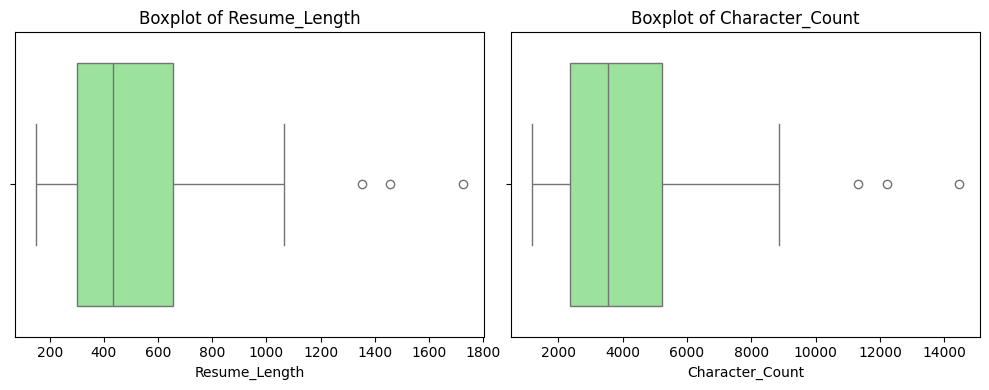

In [ ]:
# Create some numeric features from text
resume_data['Resume_Length'] = resume_data['Resume_Details'].apply(lambda x: len(x.split()))
resume_data['Character_Count'] = resume_data['Resume_Details'].apply(len)

# Visualize boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

for i, col in enumerate(['Resume_Length', 'Character_Count'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=resume_data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply to the new numeric columns
resume_data = remove_outliers_iqr(resume_data, 'Resume_Length')
resume_data = remove_outliers_iqr(resume_data, 'Character_Count')


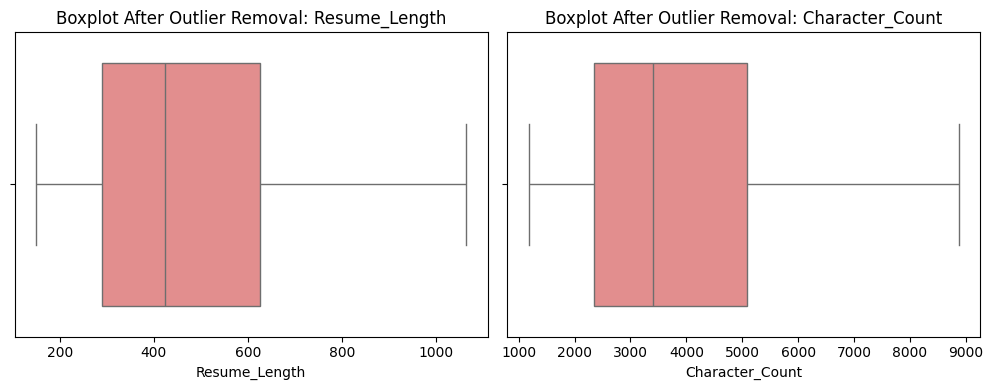

In [ ]:
# Re-plot to verify outliers are gone
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

for i, col in enumerate(['Resume_Length', 'Character_Count'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=resume_data[col], color='lightcoral')
    plt.title(f'Boxplot After Outlier Removal: {col}')

plt.tight_layout()
plt.show()


## Model Building

####Train - Test Split

In [ ]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# The following line needs to be uncommented or added if not already present
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

# ... rest of the code
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

# Now train_test_split is defined and can be used
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.20,stratify=y)
x_train.shape, x_test.shape

((60,), (16,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.20,stratify=y)
x_train.shape, x_test.shape

((60,), (16,))

####TF-IDF Vectorization

In [ ]:
tfidf_vector = TfidfVectorizer(stop_words='english', max_features=1000)

In [ ]:
x_train = tfidf_vector.fit_transform(x_train)

In [ ]:
x_test = tfidf_vector.transform(x_test)

In [ ]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'Workday' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer' 'PeopleSoft'
 'Workday' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'Workday' 'SQL Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft' 'SQL Developer' 'React JS Developer'
 'SQL Developer' 'PeopleSoft' 'PeopleSoft' 'React JS Developer'
 'SQL Developer' 'Workday' 'Workday' 'SQL Developer' 'React JS Developer'
 'Workday' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft'
 'PeopleSoft' 'PeopleSoft' 'Workday' 'SQL Developer' 'PeopleSoft'
 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday' 'Workday'
 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'Workday' 'PeopleSoft'
 'React JS Developer']
['SQL Developer' 'React JS Developer' 'PeopleSoft' 'Workday'
 'React J

(None, None)

##Classification Models

####KNN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.65
Accuracy of  test set    : 0.75
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       0.71      1.00      0.83         5
     SQL Developer       0.00      0.00      0.00         3
           Workday       0.67      1.00      0.80         4

          accuracy                           0.75        16
         macro avg       0.60      0.69      0.62        16
      weighted avg       0.64      0.75      0.67        16




####Decision Tree Classifier

In [ ]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.88
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       0.71      1.00      0.83         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      0.75      0.86         4

          accuracy                           0.88        16
         macro avg       0.93      0.85      0.87        16
      weighted avg       0.91      0.88      0.87        16




####Random Forest Classifier

In [ ]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




####Support Vectore Machine (SVM) Classifier

In [ ]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




####Logistic Regression

In [ ]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




####Bagging Classifier

In [ ]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




####AdaBoost Classifier

In [ ]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.40
Accuracy of  test set    : 0.44
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       0.00      0.00      0.00         5
     SQL Developer       0.25      1.00      0.40         3
           Workday       0.00      0.00      0.00         4

          accuracy                           0.44        16
         macro avg       0.31      0.50      0.35        16
      weighted avg       0.30      0.44      0.33        16




####Gradient Boosting Classifier

In [ ]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




####Naive Bayes Classifier

In [ ]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




##Model Evaluation

In [ ]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.650000,0.75,0.60,0.69,0.62
1,DecisionTree Classifier,1.000000,0.88,0.93,0.85,0.87
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,1.00,1.00,1.00,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.966667,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.400000,0.44,0.31,0.50,0.35
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as files:
  pickle.dump(model_NB,files)

In [ ]:
with open('model.pkl','rb') as f:
  model = pickle.load(f)

In [ ]:
prediction =model.predict(x_test)

In [ ]:
prediction

array(['SQL Developer', 'React JS Developer', 'PeopleSoft', 'Workday',
       'React JS Developer', 'React JS Developer', 'Workday', 'Workday',
       'Workday', 'PeopleSoft', 'SQL Developer', 'PeopleSoft',
       'React JS Developer', 'React JS Developer', 'PeopleSoft',
       'SQL Developer'], dtype='<U18')